# The Minimal Nerual Network Training Task

In this file, I will try to classify the MNIST with MLP neural network, to comprehensively experience the flow of training nerual network

### Part 0: Make Basic Preparation

In [1]:
# Step0: make basic preparation

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import tqdm as tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Successfully imported, and the device is {device}")

print("Torch version: ", torch.__version__)
print("Torchvision version: ", torchvision.__version__)
print("CUDA available: ",torch.cuda.is_available())

Successfully imported, and the device is cuda
Torch version:  2.5.1+cu121
Torchvision version:  0.20.1+cu121
CUDA available:  True


### Part 1: Load in the Datasets

In [2]:
# This part is to load in the data

from torchvision import datasets, transforms    # datasets: store the toy example, tranforms: turn img into sth like tensor
from torch.utils.data import DataLoader         # DataLoader: turn processed data into iterable batches

# Define an object to wrap the method up
transform = transforms.ToTensor()

# load in the datasets 
train_data = datasets.MNIST(
    root = "./data",
    train = True,
    download = True,
    transform = transform
)

test_data = datasets.MNIST(
    root = "./data",
    train = False,
    download = True,
    transform = transform
)

# wrap the datasets into iterable batches
train_loader = DataLoader(
    train_data,
    batch_size = 64,
    shuffle = True
)

test_loader = DataLoader(
    test_data,
    batch_size = 64,
    shuffle = False
)

Type of image: <class 'torch.Tensor'>, torch.Size([1, 28, 28])
Type of label: <class 'int'>


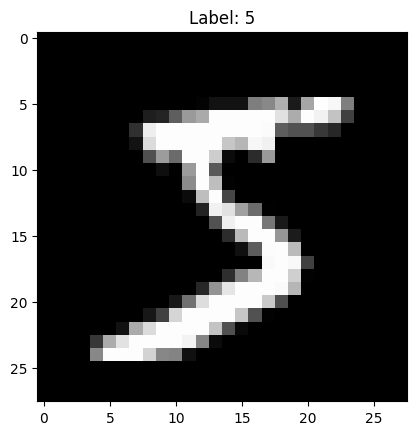

The index is: 0
The shape of x is: torch.Size([64, 1, 28, 28])
The shape of y is: torch.Size([64])
[3, 2, 5, 6, 0, 4, 7, 0, 3, 7, 3, 7, 4, 3, 6, 0, 2, 1, 9, 3, 6, 0, 5, 6, 9, 8, 7, 0, 8, 5, 7, 5, 4, 0, 3, 6, 4, 0, 4, 3, 1, 3, 6, 4, 6, 0, 7, 7, 8, 2, 3, 9, 7, 3, 9, 6, 3, 8, 9, 9, 7, 8, 0, 0]


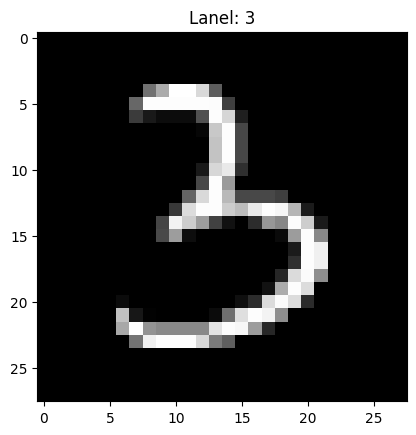

In [3]:
# This cell is just a practice to have a deeper understanding of the previous contents
# Feel free to skip this cell

img, label = train_data[0]
print(f"Type of image: {type(img)}, {img.shape}")
print(f"Type of label: {type(label)}")

# draw the first image
plt.imshow(img.squeeze().numpy(), cmap = "gray")
plt.title(f"Label: {label}")
plt.show()


for index, (x, y) in enumerate(train_loader):
    print(f"The index is: {index}")
    print(f"The shape of x is: {x.shape}")
    print(f"The shape of y is: {y.shape}")
    print(y.tolist())

    img, label = x[0], y[0]

    plt.imshow(img.squeeze().numpy(), cmap = "gray")
    plt.title(f"Lanel: {label}")
    plt.show()

    break

### Part 2: Define the MLP

In [4]:
# This part is to define the MLP

import torch.nn as nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x: torch.Tensor):
        x = x.view(x.size(0), -1)       # shape(batch_size, dim)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# This is just the test code for previously-defined MLP class
# Feel free to skip this cell

model = MLP()
test_MLP_x = torch.randn(64, 1, 28, 28)     # a batch
test_result = model(test_MLP_x)

print("The shape of the result is: ", test_result.shape)

for parameter in model.parameters():
    print(parameter.shape)

print(model.parameters)

The shape of the result is:  torch.Size([64, 10])
torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])
<bound method Module.parameters of MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)>


### Part 3: Define Loss Function and Optimizer

In [6]:
# Define the loss function (cross entropy) and the optimizer (Adam)

model = MLP().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [7]:
# This part is just for testing
# Feel free to skip this

i = 0
for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    print("Loss: ", loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1
    if i == 20:
        break

Loss:  tensor(2.2806, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.2808, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.2743, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.2639, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.2337, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.1822, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.2011, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.1677, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.0754, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.0717, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.0556, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.0493, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(2.0238, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(1.9468, device='cuda:0', grad_fn=<NllLossBackward0>)
Loss:  tensor(1.9567, device='cuda:0', grad_fn=<NllLossBackwar

In [8]:
# This is the break down of underlying details of the previous pribciples.
# I think it is important to understand all these things

# understand the type and ask chat gpt what types are they
print("The type of model.parmaeters() is:\n", type(model.parameters()), "\n")
for p in model.parameters():
    print("p in model.parameters()\nThe type of p is:\n", type(p), "\n")
    break



The type of model.parmaeters() is:
 <class 'generator'> 

p in model.parameters()
The type of p is:
 <class 'torch.nn.parameter.Parameter'> 



### Part 4: Train and Evaluate the Loss Function

In [9]:
num_epochs = 50
train_losses = []
model = model.to(device)

for epoch in range(num_epochs):
    model.train()       # enable sth like Dropout, BN
    total_loss = 0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        y_hat = model(x)
        loss = loss_func(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss.item())
    print(f"Epoch {epoch+1}: avg train loss = {avg_loss:.4f}")


Epoch 1: avg train loss = 0.3130
Epoch 2: avg train loss = 0.1478
Epoch 3: avg train loss = 0.0994
Epoch 4: avg train loss = 0.0737
Epoch 5: avg train loss = 0.0581
Epoch 6: avg train loss = 0.0464
Epoch 7: avg train loss = 0.0376
Epoch 8: avg train loss = 0.0322
Epoch 9: avg train loss = 0.0260
Epoch 10: avg train loss = 0.0226
Epoch 11: avg train loss = 0.0193
Epoch 12: avg train loss = 0.0164
Epoch 13: avg train loss = 0.0154
Epoch 14: avg train loss = 0.0110
Epoch 15: avg train loss = 0.0118
Epoch 16: avg train loss = 0.0130
Epoch 17: avg train loss = 0.0091
Epoch 18: avg train loss = 0.0097
Epoch 19: avg train loss = 0.0101
Epoch 20: avg train loss = 0.0074
Epoch 21: avg train loss = 0.0077
Epoch 22: avg train loss = 0.0095
Epoch 23: avg train loss = 0.0080
Epoch 24: avg train loss = 0.0071
Epoch 25: avg train loss = 0.0080
Epoch 26: avg train loss = 0.0072
Epoch 27: avg train loss = 0.0077
Epoch 28: avg train loss = 0.0054
Epoch 29: avg train loss = 0.0061
Epoch 30: avg train los

In [10]:
def evaluate(model, data_loader):
    model.eval()  # 关闭 Dropout / BN 等
    correct = 0
    total = 0

    with torch.no_grad():
        for x, y in data_loader:
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            preds = torch.argmax(y_hat, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    acc = correct / total
    return acc

In [11]:
test_acc = evaluate(model, test_loader)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9777


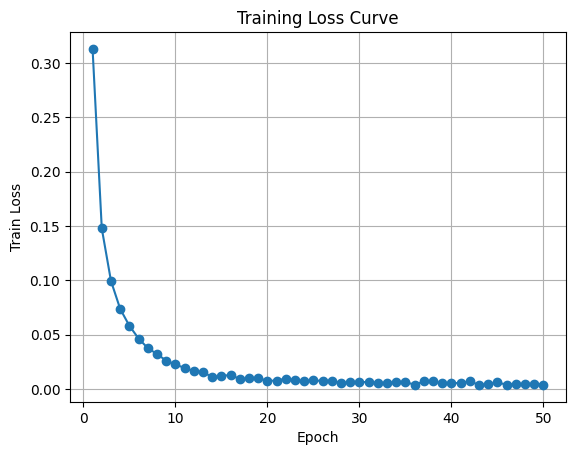

In [12]:
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve')
plt.grid(True)

# 保存图像（高分辨率）
plt.savefig("train_loss_curve.png", dpi=300, bbox_inches="tight")

plt.show()

torch.save(model.state_dict(), "model.pth")

In [13]:
import os

# 创建保存结果的目录
os.makedirs("test_results", exist_ok=True)

max_errors_to_save = 1000
error_saved = 0

with open("test_results/test.result", "w") as f:
    model.eval()
    with torch.no_grad():
        for idx, (x, y) in enumerate(test_loader):
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            preds = torch.argmax(y_hat, dim=1)

            for i in range(x.size(0)):
                pred = preds[i].item()
                true = y[i].item()
                correct = pred == true

                if not correct:
                    img = x[i].cpu().squeeze().numpy()
                    plt.imshow(img, cmap="gray")
                    plt.axis("off")

                    # 用红字写上预测和真实值
                    plt.title(f"Pred: {pred} | True: {true}", fontsize=12, color='red')

                    filename = f"pred={pred}_true={true}_False_{idx * x.size(0) + i}.png"
                    plt.savefig(
                        f"test_results/{filename}",
                        bbox_inches='tight',
                        dpi=300
                    )
                    plt.close()

                    f.write(f"{idx * x.size(0) + i}: pred={pred}, true={true}, correct={correct}, saved={filename}\n")
                    error_saved += 1

                    if error_saved >= max_errors_to_save:
                        break
            if error_saved >= max_errors_to_save:
                break

In [16]:
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 收集所有预测和真实值
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        y_hat = model(x)
        preds = torch.argmax(y_hat, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# 生成混淆矩阵
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("test_results/confusion_matrix.png", dpi=300)
plt.close()